# SPARK

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Table of Contents
* [SPARK](#SPARK)
* [Spark Context](#Spark-Context)
	* &nbsp;
		* [Create A RDD](#Create-A-RDD)
		* [Call `collect` on an RDD: Lazy Spark](#Call-collect-on-an-RDD:-Lazy-Spark)
		* [Operations on RDDs](#Operations-on-RDDs)
		* [Word Examples](#Word-Examples)
		* [Key Value Pairs](#Key-Value-Pairs)
		* [word count 1](#word-count-1)
		* [word count 2:  `reduceByKey()`](#word-count-2:--reduceByKey%28%29)
		* [Nested Syntax](#Nested-Syntax)
		* [Using Cache](#Using-Cache)
		* [Fun with words](#Fun-with-words)
		* [DataFrames](#DataFrames)
		* [Machine Learning](#Machine-Learning)


With shameless stealing of some code and text from:

- https://github.com/tdhopper/rta-pyspark-presentation/blob/master/slides.ipynb
- Databricks and Berkeley Spark MOOC: https://www.edx.org/course/introduction-big-data-apache-spark-uc-berkeleyx-cs100-1x

which you should go check out.

Installing (Py)Spark locally
For Mac users using Homebrew:

```
$ brew install apache-spark
```

Install Java SDK

OR: Use the Vagrant based solution which will be talked about in the lab.

```
$ IPYTHON=1 pyspark
```

```
$ $ IPYTHON_OPTS="notebook --matplotlib inline" pyspark
```

```
➜  ~  /anaconda/bin/pip install findspark
You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Collecting findspark
  Downloading findspark-0.0.5-py2.py3-none-any.whl
Installing collected packages: findspark
Successfully installed findspark-0.0.5
```

#Spark Context

You can also use it directly from the notebook interface on the mac if you installed `apache-spark` using `brew` and also installed `findspark` above.

In [2]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()

It also output's a bunch of stuff on my terminal. This is because the entire java context is started up.

```Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
15/10/21 14:46:15 INFO SparkContext: Running Spark version 1.4.0
2015-10-21 14:46:15.774 java[30685:c003] Unable to load realm info from SCDynamicStore
15/10/21 14:46:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
15/10/21 14:46:15 INFO SecurityManager: Changing view acls to: rahul
15/10/21 14:46:15 INFO SecurityManager: Changing modify acls to: rahul
15/10/21 14:46:15 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(rahul); users with modify permissions: Set(rahul)
15/10/21 14:46:16 INFO Slf4jLogger: Slf4jLogger started
15/10/21 14:46:16 INFO Remoting: Starting remoting
15/10/21 14:46:16 INFO Remoting: Remoting started; listening on addresses :[akka.tcp://sparkDriver@10.251.101.163:64359]
15/10/21 14:46:16 INFO Utils: Successfully started service 'sparkDriver' on port 64359.
15/10/21 14:46:16 INFO SparkEnv: Registering MapOutputTracker
15/10/21 14:46:16 INFO SparkEnv: Registering BlockManagerMaster
15/10/21 14:46:16 INFO DiskBlockManager: Created local directory at /private/var/folders/_f/y76rs29s3c57ykwyz9c8z12c0000gn/T/spark-00a4e09e-e5db-485f-81dc-2e5016e9a27e/blockmgr-8966e07c-223b-4c38-9273-11543aa9d3c1
15/10/21 14:46:16 INFO MemoryStore: MemoryStore started with capacity 273.0 MB
15/10/21 14:46:16 INFO HttpFileServer: HTTP File server directory is /private/var/folders/_f/y76rs29s3c57ykwyz9c8z12c0000gn/T/spark-00a4e09e-e5db-485f-81dc-2e5016e9a27e/httpd-6af0a9e0-1cfe-42c4-a1bd-e01715b98436
15/10/21 14:46:16 INFO HttpServer: Starting HTTP Server
15/10/21 14:46:17 INFO Utils: Successfully started service 'HTTP file server' on port 64360.
15/10/21 14:46:17 INFO SparkEnv: Registering OutputCommitCoordinator
15/10/21 14:46:18 INFO Utils: Successfully started service 'SparkUI' on port 4040.
15/10/21 14:46:18 INFO SparkUI: Started SparkUI at http://10.251.101.163:4040
15/10/21 14:46:18 INFO Executor: Starting executor ID driver on host localhost
15/10/21 14:46:18 INFO Utils: Successfully started service 'org.apache.spark.network.netty.NettyBlockTransferService' on port 64361.
15/10/21 14:46:18 INFO NettyBlockTransferService: Server created on 64361
15/10/21 14:46:18 INFO BlockManagerMaster: Trying to register BlockManager
15/10/21 14:46:18 INFO BlockManagerMasterEndpoint: Registering block manager localhost:64361 with 273.0 MB RAM, BlockManagerId(driver, localhost, 64361)
15/10/21 14:46:18 INFO BlockManagerMaster: Registered BlockManager
```

In [3]:
sc

In [4]:
sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).map(lambda x: x**2).sum()

385

### Create A RDD


In [5]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
# Print out the type of wordsRDD
print type(wordsRDD)

<class 'pyspark.rdd.RDD'>


### Call `collect` on an RDD: Lazy Spark

Spark is lazy. Until you `collect`, nothing is actually run.

>Instead, they just remember the transformations applied to some base dataset (e.g. a file). The transformations are only computed when an action requires a result to be returned to the driver program.

In [6]:
wordsRDD.collect()

['cat', 'elephant', 'rat', 'rat', 'cat']

```
15/10/21 14:59:59 INFO SparkContext: Starting job: collect at <ipython-input-6-dee494da0714>:1
15/10/21 14:59:59 INFO DAGScheduler: Got job 0 (collect at <ipython-input-6-dee494da0714>:1) with 4 output partitions (allowLocal=false)
15/10/21 14:59:59 INFO DAGScheduler: Final stage: ResultStage 0(collect at <ipython-input-6-dee494da0714>:1)
15/10/21 14:59:59 INFO DAGScheduler: Parents of final stage: List()
15/10/21 14:59:59 INFO DAGScheduler: Missing parents: List()
15/10/21 14:59:59 INFO DAGScheduler: Submitting ResultStage 0 (ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:396), which has no missing parents
15/10/21 15:00:00 INFO MemoryStore: ensureFreeSpace(1224) called with curMem=0, maxMem=286300569
15/10/21 15:00:00 INFO MemoryStore: Block broadcast_0 stored as values in memory (estimated size 1224.0 B, free 273.0 MB)
15/10/21 15:00:00 INFO MemoryStore: ensureFreeSpace(777) called with curMem=1224, maxMem=286300569
15/10/21 15:00:00 INFO MemoryStore: Block broadcast_0_piece0 stored as bytes in memory (estimated size 777.0 B, free 273.0 MB)
15/10/21 15:00:00 INFO BlockManagerInfo: Added broadcast_0_piece0 in memory on localhost:64361 (size: 777.0 B, free: 273.0 MB)
15/10/21 15:00:00 INFO SparkContext: Created broadcast 0 from broadcast at DAGScheduler.scala:874
15/10/21 15:00:00 INFO DAGScheduler: Submitting 4 missing tasks from ResultStage 0 (ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:396)
15/10/21 15:00:00 INFO TaskSchedulerImpl: Adding task set 0.0 with 4 tasks
15/10/21 15:00:00 INFO TaskSetManager: Starting task 0.0 in stage 0.0 (TID 0, localhost, PROCESS_LOCAL, 1379 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 1.0 in stage 0.0 (TID 1, localhost, PROCESS_LOCAL, 1384 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 2.0 in stage 0.0 (TID 2, localhost, PROCESS_LOCAL, 1379 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 3.0 in stage 0.0 (TID 3, localhost, PROCESS_LOCAL, 1403 bytes)
15/10/21 15:00:00 INFO Executor: Running task 0.0 in stage 0.0 (TID 0)
15/10/21 15:00:00 INFO Executor: Running task 2.0 in stage 0.0 (TID 2)
15/10/21 15:00:00 INFO Executor: Running task 1.0 in stage 0.0 (TID 1)
15/10/21 15:00:00 INFO Executor: Running task 3.0 in stage 0.0 (TID 3)
15/10/21 15:00:00 INFO Executor: Finished task 1.0 in stage 0.0 (TID 1). 646 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 3.0 in stage 0.0 (TID 3). 665 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 0.0 in stage 0.0 (TID 0). 641 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 2.0 in stage 0.0 (TID 2). 641 bytes result sent to driver
15/10/21 15:00:00 INFO TaskSetManager: Finished task 1.0 in stage 0.0 (TID 1) in 61 ms on localhost (1/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 3.0 in stage 0.0 (TID 3) in 60 ms on localhost (2/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 0.0 in stage 0.0 (TID 0) in 96 ms on localhost (3/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 2.0 in stage 0.0 (TID 2) in 63 ms on localhost (4/4)
15/10/21 15:00:00 INFO DAGScheduler: ResultStage 0 (collect at <ipython-input-6-dee494da0714>:1) finished in 0.120 s
15/10/21 15:00:00 INFO TaskSchedulerImpl: Removed TaskSet 0.0, whose tasks have all completed, from pool
15/10/21 15:00:00 INFO DAGScheduler: Job 0 finished: collect at <ipython-input-6-dee494da0714>:1, took 0.872367 s
```

###Operations on RDDs

From the Spark Programming Guide:

>RDDs support two types of operations: transformations, which create a new dataset from an existing one, and actions, which return a value to the driver program after running a computation on the dataset. For example, map is a transformation that passes each dataset element through a function and returns a new RDD representing the results. On the other hand, reduce is an action that aggregates all the elements of the RDD using some function and returns the final result to the driver program (although there is also a parallel reduceByKey that returns a distributed dataset).

###Word Examples

In [7]:
def makePlural(word):
    return word + 's'

print makePlural('cat')

cats


Transform one RDD into another.

In [8]:
pluralRDD = wordsRDD.map(makePlural)
print pluralRDD.first()
print pluralRDD.take(2)


cats
['cats', 'elephants']


In [9]:
pluralRDD.take(1)

['cats']

In [10]:
pluralRDD.collect()

['cats', 'elephants', 'rats', 'rats', 'cats']

### Key Value Pairs

In [11]:
wordPairs = wordsRDD.map(lambda w: (w, 1))
print wordPairs.collect()

[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]


```
➜  sparklect  ps auxwww | grep pyspark
rahul           30685   0.4  0.8  3458120  68712 s012  S+    2:46PM   2:00.21 /System/Library/Java/JavaVirtualMachines/1.6.0.jdk/Contents/Home/bin/java -cp /usr/local/opt/apache-spark/libexec/conf/:/usr/local/opt/apache-spark/libexec/lib/spark-assembly-1.4.0-hadoop2.6.0.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-api-jdo-3.2.6.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-core-3.2.10.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-rdbms-3.2.9.jar -Xms512m -Xmx512m -XX:MaxPermSize=128m org.apache.spark.deploy.SparkSubmit pyspark-shell
rahul           31520   0.0  0.0  2432784    480 s011  R+    6:42PM   0:00.00 grep --color=auto --exclude-dir=.bzr --exclude-dir=.cvs --exclude-dir=.git --exclude-dir=.hg --exclude-dir=.svn pyspark
rahul           31494   0.0  0.7  2548972  57288 s012  S     6:41PM   0:00.10 python -m pyspark.daemon
rahul           31493   0.0  0.7  2548972  57308 s012  S     6:41PM   0:00.10 python -m pyspark.daemon
rahul           31492   0.0  0.7  2548972  57288 s012  S     6:41PM   0:00.11 python -m pyspark.daemon
rahul           31446   0.0  0.8  2548972  68460 s012  S     6:35PM   0:01.34 python -m pyspark.daemon
```

### WORD COUNT!

In [12]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
wordCountsCollected = (wordsRDD
                       .map(lambda w: (w, 1))
                       .reduceByKey(lambda x,y: x+y)
                       .collect())
print wordCountsCollected

[('rat', 2), ('elephant', 1), ('cat', 2)]


![Tons of shuffling](https://databricks.gitbooks.io/databricks-spark-knowledge-base/content/images/reduce_by.png)

In [13]:
print (wordsRDD
    .map(lambda w: (w, 1))
    .reduceByKey(lambda x,y: x+y)).toDebugString()

(4) PythonRDD[19] at RDD at PythonRDD.scala:43 []
 |  MapPartitionsRDD[18] at mapPartitions at PythonRDD.scala:346 []
 |  ShuffledRDD[17] at partitionBy at NativeMethodAccessorImpl.java:-2 []
 +-(4) PairwiseRDD[16] at reduceByKey at <ipython-input-13-c1214cba7909>:3 []
    |  PythonRDD[15] at reduceByKey at <ipython-input-13-c1214cba7909>:3 []
    |  ParallelCollectionRDD[9] at parallelize at PythonRDD.scala:396 []


### Using Cache

In [14]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
print wordsRDD
wordsRDD.count()


ParallelCollectionRDD[20] at parallelize at PythonRDD.scala:396


5

In [15]:
#this is rerun from the start
wordsRDD.count()

5

In [16]:
#default storage level (MEMORY_ONLY)
wordsRDD.cache()#nothing done this is still lazy

ParallelCollectionRDD[20] at parallelize at PythonRDD.scala:396

In [17]:
#parallelize is rerun and cached because we told it to cache
wordsRDD.count()

5

In [18]:
#this `sc.parallelize` is not rerun in this case
wordsRDD.count()

5

Where is this useful: it is when you have branching parts or loops, so that you dont do things again and again. Spark, being "lazy" will rerun the chain again. So `cache` or `persist` serves as a checkpoint, breaking the RDD chain or the *lineage*.

In [19]:
birdsList=['heron','owl']
animList=wordsList+birdsList
animaldict={}
for e in wordsList:
    animaldict[e]='mammal'
for e in birdsList:
    animaldict[e]='bird'
animaldict

{'cat': 'mammal',
 'elephant': 'mammal',
 'heron': 'bird',
 'owl': 'bird',
 'rat': 'mammal'}

In [20]:
animsrdd = sc.parallelize(animList, 4)
animsrdd.cache()
#below runs the whole chain but causes cache to be populated
mammalcount=animsrdd.filter(lambda w: animaldict[w]=='mammal').count()
#now only the filter is carried out
birdcount=animsrdd.filter(lambda w: animaldict[w]=='bird').count()
print mammalcount, birdcount

5 2


### Fun with words

Read http://spark.apache.org/docs/latest/programming-guide.html .

In [22]:
stopwords=[e.strip() for e in open("./sparklect/english.stop.txt").readlines()]

In [23]:
juliusrdd=sc.textFile("./sparklect/shakes/juliuscaesar.txt")

In [24]:
juliusrdd.flatMap(lambda line: line.split()).count()

21245

In [25]:
(juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
  .take(20)
)

[u'1599',
 u'the',
 u'tragedy',
 u'of',
 u'julius',
 u'caesar',
 u'by',
 u'william',
 u'shakespeare',
 u'dramatis',
 u'personae',
 u'julius',
 u'caesar,',
 u'roman',
 u'statesman',
 u'and',
 u'general',
 u'octavius,',
 u'triumvir',
 u'after']

In [26]:
(juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .take(20)
)

[u'1599',
 u'tragedy',
 u'julius',
 u'caesar',
 u'william',
 u'shakespeare',
 u'dramatis',
 u'personae',
 u'julius',
 u'caesar,',
 u'roman',
 u'statesman',
 u'general',
 u'octavius,',
 u'triumvir',
 u"caesar's",
 u'death,',
 u'augustus',
 u'caesar,',
 u'emperor']

In [27]:
(juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .map(lambda word: (word, 1))
 .take(20)
)

[(u'1599', 1),
 (u'tragedy', 1),
 (u'julius', 1),
 (u'caesar', 1),
 (u'william', 1),
 (u'shakespeare', 1),
 (u'dramatis', 1),
 (u'personae', 1),
 (u'julius', 1),
 (u'caesar,', 1),
 (u'roman', 1),
 (u'statesman', 1),
 (u'general', 1),
 (u'octavius,', 1),
 (u'triumvir', 1),
 (u"caesar's", 1),
 (u'death,', 1),
 (u'augustus', 1),
 (u'caesar,', 1),
 (u'emperor', 1)]

In [28]:
(juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .map(lambda word: (word, 1))
 .reduceByKey(lambda a, b: a + b)
 .take(20)
)

[(u'fawn', 2),
 (u'pardon', 5),
 (u'shouted.', 1),
 (u'foul', 1),
 (u'cause;', 1),
 (u'cognizance.', 1),
 (u'sleep', 6),
 (u'abide', 2),
 (u"friend's", 1),
 (u'muffling', 1),
 (u'hate', 1),
 (u'up.', 3),
 (u'up,', 3),
 (u'pardon!', 1),
 (u'venom', 1),
 (u'presents', 1),
 (u'whatsoever', 1),
 (u'sway', 1),
 (u'hats', 1),
 (u'reveler!', 1)]

In [29]:
(juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .map(lambda word: (word, 1))
 .reduceByKey(lambda a, b: a + b)
 .takeOrdered(20, lambda x: -x[1])
)

[(u'brutus.', 211),
 (u'cassius.', 152),
 (u'thou', 107),
 (u'caesar', 96),
 (u'brutus', 75),
 (u'antony.', 73),
 (u'citizen.', 68),
 (u'good', 66),
 (u'caesar.', 62),
 (u'thy', 54),
 (u'brutus,', 54),
 (u'caesar,', 46),
 (u'casca.', 44),
 (u'"', 44),
 (u'men', 41),
 (u'you,', 41),
 (u'enter', 40),
 (u"caesar's", 40),
 (u'lucius.', 38),
 (u'cassius,', 38)]

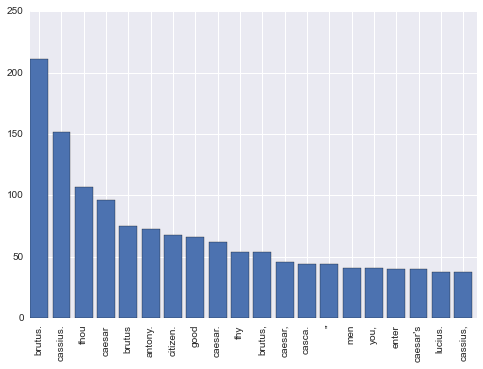

In [30]:
captions, counts=zip(*juliusrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .map(lambda word: (word, 1))
 .reduceByKey(lambda a, b: a + b)
 .takeOrdered(20, lambda x: -x[1])
)
pos = np.arange(len(counts))
plt.bar(pos, counts);
plt.xticks(pos+0.4, captions, rotation=90);

In [31]:
shakesrdd=sc.textFile("./sparklect/shakes/*.txt", minPartitions=4)

In [31]:
shakesrdd.take(10)

[u'1601',
 u'AS YOU LIKE IT',
 u'',
 u'by William Shakespeare',
 u'',
 u'',
 u'',
 u'DRAMATIS PERSONAE.',
 u'',
 u'']

In [32]:
(shakesrdd.flatMap(lambda line: line.split())
 .map(lambda word: word.strip().lower())
 .filter(lambda word: word not in stopwords)
 .map(lambda word: (word, 1))
 .reduceByKey(lambda a, b: a + b)
 .map(lambda (x,y): (y,x))
 .sortByKey(0,1)
 .take(30)
)

[(2001, u'thou'),
 (1547, u'thy'),
 (1094, u'good'),
 (774, u'hath'),
 (703, u'thee'),
 (692, u'you,'),
 (640, u'make'),
 (599, u"'tis"),
 (597, u'enter'),
 (567, u'sir,'),
 (565, u'love'),
 (556, u'give'),
 (493, u'me,'),
 (489, u'o,'),
 (427, u'man'),
 (393, u'come,'),
 (390, u'lord,'),
 (389, u'sir'),
 (377, u'why,'),
 (359, u'you.'),
 (358, u'ham.'),
 (351, u'doth'),
 (348, u'speak'),
 (338, u'now,'),
 (327, u'king'),
 (324, u'him.'),
 (324, u'hear'),
 (323, u'time'),
 (314, u'art'),
 (312, u'scene')]

`SparkContext.wholeTextFile`...

>lets you read a directory containing multiple small text files, and returns each of them as (filename, content) pairs. This is in contrast with textFile, which would return one record per line in each file

From http://www.stat.berkeley.edu/scf/paciorek-spark-2014.html:

>You want each partition to be able to fit in the memory availalbe on a node, and if you have multi-core nodes, you want that as many partitions as there are cores be able to fit in memory.

>For load-balancing you'll want at least as many partitions as total computational cores in your cluster and probably rather more partitions. The Spark documentation suggests 2-4 partitions (which they also seem to call slices) per CPU. Often there are 100-10,000 partitions. Another rule of thumb is that tasks should take at least 100 ms. If less than that, you may want to repartition to have fewer partitions.

###DataFrames

Convert Spark DataFrame to Pandas

`pandas_df = spark_df.toPandas()`

Create a Spark DataFrame from Pandas

`spark_df = context.createDataFrame(pandas_df)`

Must fit in memory.

![](https://ogirardot.files.wordpress.com/2015/05/rdd-vs-dataframe.png?w=640&h=360)

VERY IMPORTANT: DataFrames in Spark are like RDD in the sense that they’re an immutable data structure.

In [33]:
df=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/stats/data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [34]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)
sparkdf = sqlsc.createDataFrame(df)
sparkdf

DataFrame[Gender: string, Height: double, Weight: double]

In [35]:
sparkdf.show(5)

+------+-----------------+----------------+
|Gender|           Height|          Weight|
+------+-----------------+----------------+
|  Male|  73.847017017515|241.893563180437|
|  Male|68.78190404589029|  162.3104725213|
|  Male|74.11010539178491|  212.7408555565|
|  Male| 71.7309784033377|220.042470303077|
|  Male| 69.8817958611153|206.349800623871|
+------+-----------------+----------------+



In [36]:
type(sparkdf.Gender)

pyspark.sql.column.Column

In [37]:
temp = sparkdf.map(lambda r: r.Gender)
print type(temp)
temp.take(10)

<class 'pyspark.rdd.PipelinedRDD'>


[u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male',
 u'Male']

###Machine Learning

In [37]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint

data=sparkdf.map(lambda row: LabeledPoint(row.Gender=='Male',[row.Height, row.Weight]))
data.take(5)

[LabeledPoint(1.0, [73.8470170175,241.89356318]),
 LabeledPoint(1.0, [68.7819040459,162.310472521]),
 LabeledPoint(1.0, [74.1101053918,212.740855557]),
 LabeledPoint(1.0, [71.7309784033,220.042470303]),
 LabeledPoint(1.0, [69.8817958611,206.349800624])]

In [38]:
data2=sparkdf.map(lambda row: LabeledPoint(row[0]=='Male',row[1:]))
data2.take(1)[0].label, data2.take(1)[0].features

(1.0, DenseVector([73.847, 241.8936]))

In [39]:
train, test = data.randomSplit([0.7,0.3])
train.cache()
test.cache()

PythonRDD[76] at RDD at PythonRDD.scala:43

In [40]:
type(train)

pyspark.rdd.PipelinedRDD

In [41]:
model = LogisticRegressionWithLBFGS.train(train)

In [42]:
model.weights

DenseVector([-0.2554, 0.1052])

In [44]:
results = test.map(lambda lp: (lp.label, float(model.predict(lp.features))))
print results.take(10)
type(results)                       

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]


pyspark.rdd.PipelinedRDD

In [45]:
test_accuracy=results.filter(lambda (a,p): a==p).count()/float(results.count())
test_accuracy

0.92220367278798

In [46]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
metrics = BinaryClassificationMetrics(results)

In [47]:
print type(metrics)
metrics.areaUnderROC

<class 'pyspark.mllib.evaluation.BinaryClassificationMetrics'>


0.9221911239964319

In [48]:
type(model)

pyspark.mllib.classification.LogisticRegressionModel

In [48]:
!rm -rf mylogistic.model

In [49]:
model.save(sc, "mylogistic.model")

The pipeline API automates a lot of this stuff, allowing us to work directly on dataframes. It is not all supported in Python, as yet. More of it in the HW.

Also see:

- http://jordicasanellas.weebly.com/data-science-blog/machine-learning-with-spark
- http://spark.apache.org/docs/latest/mllib-guide.html
- http://www.techpoweredmath.com/spark-dataframes-mllib-tutorial/
- http://spark.apache.org/docs/latest/api/python/
- http://spark.apache.org/docs/latest/programming-guide.html

`rdd.saveAsTextFile()` saves an RDD as a string.

In [50]:
sc.stop()